In [1]:
import cv2

import json
import numpy as np
import pandas as pd
from numpy.linalg import svd

import matplotlib.pyplot as plt

from IPython.display import display

from utils.skeleton_keypoints import compare_keypoints_list
keypoints_columns = [f"{keypoint}_{axis}" for keypoint in compare_keypoints_list for axis in ["x", "y"]]

In [2]:
df_sync = pd.read_csv("camera_sync.csv")
display(df_sync)

,max_lim_0,max_lim_1,max_lim_2,max_lim_3,max_lim_4,toe_off_0,toe_off_1,toe_off_2,toe_off_3,toe_off_4
0,NaN,NaN,NaN,NaN,NaN,73,76,77,77,76
1,NaN,NaN,NaN,NaN,NaN,84,87,88,88,87
2,NaN,NaN,NaN,NaN,NaN,92,95,96,96,95
3,NaN,NaN,NaN,NaN,NaN,116,119,120,120,119
4,NaN,NaN,NaN,NaN,NaN,62,65,66,66,65
5,NaN,NaN,NaN,NaN,NaN,102,105,106,106,105
6,NaN,NaN,NaN,NaN,NaN,106,109,110,110,109
7,NaN,NaN,NaN,NaN,NaN,135,138,139,139,138
8,NaN,NaN,NaN,NaN,NaN,68,71,72,72,71
9,NaN,NaN,NaN,NaN,NaN,63,66,67,67,66


In [22]:
camera_num = 1
data_num = 1

In [23]:
json_dict = {
    0: "28/kitano_iphone16.json",
    1: "28/kitano_iphone11.json",
    2: "28/uratani_iphone15pro.json",
    3: "28/ebihara_iphone15.json",
    4: "28/kitano_iphone11.json",
}

In [24]:
with open(json_dict[camera_num]) as f:
    camera_calibration = json.load(f)
mtx = np.array(camera_calibration["mtx"])
dist = np.array(camera_calibration["dist"])
print(f"mtx: {mtx}")
print(f"dist: {dist}")

mtx: [[1.60398734e+03 0.00000000e+00 9.93219051e+02]
 [0.00000000e+00 1.59940569e+03 5.67313847e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
dist: [[ 0.31413362 -0.20736789  0.01027568  0.02557858 -1.89528907]]


In [25]:
df_2d = pd.read_csv(f"28/hirasaki_{camera_num}_{data_num}.csv", index_col=0)
df_2d = df_2d.drop(columns=[col for col in df_2d.columns if "visibility" in col])
columns_basic = [s.replace("_x", "")for  s in df_2d.filter(regex="_x").columns]
lag = df_sync.filter(like="toe").iloc[data_num, camera_num] - df_sync.filter(like="toe").iloc[data_num].min()
print(f"lag: {lag}")
df_2d.index -= lag
df_2d = df_2d[df_2d.index >= 1]
display(df_2d)

df_3d = pd.read_csv(f"28/hirasaki_{data_num}_trajectories.csv", index_col=0)
del df_3d["time"]
df_2d = df_2d[df_2d.index <= len(df_3d)]
display(df_3d)

lag: 3


,RWRL_x,RWRL_y,RWRM_x,RWRM_y,RELL_x,RELL_y,RELM_x,RELM_y,RSHF_x,RSHF_y,...,LKNL_x,LKNL_y,LKNM_x,LKNM_y,LTRO_x,LTRO_y,REAR_x,REAR_y,LEAR_x,LEAR_y
frame,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,RWRL_x,RWRL_y,RWRL_z,RWRM_x,RWRM_y,RWRM_z,RELL_x,RELL_y,RELL_z,RELM_x,...,LKNM_z,LTRO_x,LTRO_y,LTRO_z,REAR_x,REAR_y,REAR_z,LEAR_x,LEAR_y,LEAR_z
frame,,,,,,,,,,,,,,,,,,,,,
1,879.841736,2354.373535,905.190186,876.802429,2428.713623,884.256226,850.187744,2428.793457,1122.813232,941.480469,...,520.843018,1193.700195,2328.791260,922.146240,991.757141,2547.486816,912.910339,1175.886230,2538.031250,921.768005
2,879.948324,2353.461060,905.284800,876.736959,2427.855550,884.573466,850.236429,2427.877889,1122.970683,941.497396,...,520.994476,1193.900289,2329.703206,921.858043,991.647339,2546.792766,912.922201,1175.871969,2537.736124,921.902120
3,880.145264,2352.745036,905.383566,876.764832,2426.966715,884.761007,850.293925,2426.952148,1123.162720,941.456502,...,521.087443,1194.186930,2329.435953,922.004557,991.505249,2546.151774,912.979675,1175.746460,2537.447184,921.936483
4,880.242157,2351.761963,905.751922,877.044495,2426.166748,884.785766,850.345612,2426.024780,1123.380981,941.395050,...,521.160187,1194.475525,2329.204956,922.174500,991.417450,2545.688111,913.065125,1175.655334,2537.229126,921.961181
5,880.351136,2350.953694,905.908102,877.196757,2425.357584,885.005940,850.350830,2425.110026,1123.563070,941.374451,...,521.229166,1194.671020,2328.921793,922.228719,991.418925,2545.322266,913.170003,1175.650268,2536.946126,921.920451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,860.512634,-977.245422,900.502136,865.572662,-901.522155,887.288604,847.680633,-917.755004,1128.467468,944.137878,...,532.934753,1213.028635,-1034.648378,936.741384,979.149903,-850.954986,910.774536,1168.068360,-842.112915,909.198182
215,862.257141,-1022.786011,910.381124,864.844015,-947.330810,891.930522,846.712179,-947.229594,1133.668783,941.428100,...,543.430399,1214.477250,-1053.024489,947.778022,982.148092,-864.413127,913.582886,1171.284749,-860.639262,913.157918
216,864.189077,-1065.973125,923.199320,864.407257,-993.212280,897.597402,845.561646,-975.949737,1138.361938,938.563924,...,553.158091,1216.661528,-1071.613629,960.401271,987.031555,-878.245595,915.774770,1174.764791,-879.653646,916.101329


In [26]:
df_2d = df_2d.loc[df_2d.notnull().any(axis=1), df_2d.notnull().any(axis=0)]
display(df_2d)

columns_org = [s.replace("_x", "")for  s in df_2d.filter(regex="_x").columns]
columns_xyz = [s + axis for s in columns_org for axis in ["_x", "_y", "_z"]]
df_3d = df_3d.loc[df_2d.index]
df_3d = df_3d[columns_xyz]
display(df_3d)

,RWRL_x,RWRL_y,RELL_x,RELL_y,RSHF_x,RSHF_y,LWRL_x,LWRL_y,LWRM_x,LWRM_y,LELL_x,LELL_y,LSHF_x,LSHF_y,RKNM_x,RKNM_y,LKNL_x,LKNL_y,LTRO_x,LTRO_y
frame,,,,,,,,,,,,,,,,,,,,
8,1420.0,578.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,1426.0,525.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,1437.0,467.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,1497.0,582.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1516.0,588.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1521.0,535.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1496.0,463.0,NaN,NaN,NaN,NaN,NaN,NaN
22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1496.0,463.0,NaN,NaN,NaN,NaN,NaN,NaN
28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1496.0,463.0,NaN,NaN,NaN,NaN,NaN,NaN


,RWRL_x,RWRL_y,RWRL_z,RELL_x,RELL_y,RELL_z,RSHF_x,RSHF_y,RSHF_z,LWRL_x,...,LSHF_z,RKNM_x,RKNM_y,RKNM_z,LKNL_x,LKNL_y,LKNL_z,LTRO_x,LTRO_y,LTRO_z
frame,,,,,,,,,,,,,,,,,,,,,
8,880.845113,2348.719197,905.975403,850.223684,2422.227498,1123.773092,957.101197,2369.541219,1367.870586,1269.112956,...,1384.205119,1062.815674,2450.899415,519.647929,1239.028931,2458.378825,491.734360,1195.010559,2328.219930,922.485555
9,880.910258,2348.022135,905.992126,850.195740,2421.354004,1123.773519,957.175151,2368.680827,1367.698486,1269.261149,...,1384.244100,1062.835164,2450.693847,519.607808,1239.038452,2458.302816,491.767598,1195.066406,2328.073649,922.461649
10,881.078278,2347.304077,905.980072,850.133697,2420.544067,1123.711121,957.192322,2367.745117,1367.572998,1269.524842,...,1384.203430,1062.948364,2450.486939,519.523041,1239.080994,2458.294067,491.682053,1195.127015,2328.060913,922.357879
11,881.244141,2346.720296,905.796122,850.037618,2419.808105,1123.661988,957.234518,2366.968913,1367.299682,1269.829305,...,1384.119181,1062.981608,2450.238932,519.456624,1239.069011,2458.325358,491.680542,1195.184733,2327.978190,922.252503
12,881.328227,2346.239706,905.677195,849.961303,2419.066447,1123.623535,957.251444,2366.064778,1367.267884,1269.976339,...,1384.034892,1063.089742,2450.100016,519.488027,1239.066101,2458.439615,491.709010,1195.319661,2327.951498,922.275676
13,881.276245,2345.767578,905.632324,849.836426,2418.440430,1123.580566,957.142395,2365.375244,1367.230713,1270.155396,...,1383.985962,1063.178223,2450.137451,519.512268,1239.049194,2458.709229,491.748199,1195.456543,2327.971924,922.321411
14,881.216501,2345.330119,905.622996,849.736796,2417.812785,1123.490987,957.074168,2364.688232,1367.149841,1270.298319,...,1383.982198,1063.128093,2450.297404,519.511434,1239.009237,2459.036987,491.776174,1195.603678,2328.008911,922.231954
22,880.669067,2343.218628,905.050385,848.682403,2414.470703,1123.308106,956.422577,2360.649780,1366.544067,1271.631348,...,1384.146485,1062.917785,2450.978882,519.307984,1238.568237,2457.194214,491.431488,1195.851746,2328.477539,922.138703
28,879.894288,2341.776490,903.072388,847.942780,2410.561767,1122.256714,956.253540,2356.676635,1365.472961,1272.374329,...,1383.362365,1061.319213,2459.396241,519.643768,1236.843811,2444.595703,489.645385,1195.456238,2326.957642,921.808045


In [27]:
points_2d, points_3d = [], []

for col in columns_org:
    for idx in df_2d.index:
        if not np.isnan(df_2d.loc[idx, col + "_x"]):
            points_2d.append(df_2d.loc[idx, [col + "_x", col + "_y"]].values)
            points_3d.append(df_3d.loc[idx, [col + "_x", col + "_y", col + "_z"]].values)

points_2d, points_3d = np.array(points_2d), np.array(points_3d)
print(points_2d.shape, points_3d.shape)

(40, 2) (40, 3)


In [28]:
_, rvec, tvec, inliers = cv2.solvePnPRansac(points_3d, points_2d, mtx, None, flags=cv2.SOLVEPNP_EPNP)
print(f"rvec: {rvec}")
print(f"tvec: {tvec}")

rvec: [[ 1.50151182]
 [ 0.74675051]
 [-0.75122241]]
tvec: [[-573.30785463]
 [1053.88011831]
 [6209.24061255]]


In [29]:
with open(f"28/hirasaki_{camera_num}_extrinsic.json", "w") as f:
    json.dump({
        "mtx": mtx.tolist(),
        "dist": dist.tolist(),
        "rvec": rvec.tolist(),
        "tvec": tvec.tolist()
    }, f)

In [30]:
rotation_matrix, _ = cv2.Rodrigues(rvec)
projection_matrix = np.hstack((rotation_matrix, tvec))

In [31]:
df_2d = pd.read_csv(f"28/hirasaki_{camera_num}_{data_num}.csv", index_col=0)
df_2d = df_2d.drop(columns=[col for col in df_2d.columns if "visibility" in col])
columns_basic = [s.replace("_x", "")for  s in df_2d.filter(regex="_x").columns]
columns_xy = df_2d.columns
lag = df_sync.filter(like="toe").iloc[data_num, camera_num] - df_sync.filter(like="toe").iloc[data_num].min()
df_2d.index -= lag
df_2d = df_2d[df_2d.index >= 1]
display(df_2d)

df_3d = pd.read_csv(f"28/hirasaki_{data_num}_trajectories.csv", index_col=0)
del df_3d["time"]
df_2d = df_2d[df_2d.index <= len(df_3d)]
display(df_3d)

,RWRL_x,RWRL_y,RWRM_x,RWRM_y,RELL_x,RELL_y,RELM_x,RELM_y,RSHF_x,RSHF_y,...,LKNL_x,LKNL_y,LKNM_x,LKNM_y,LTRO_x,LTRO_y,REAR_x,REAR_y,LEAR_x,LEAR_y
frame,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,RWRL_x,RWRL_y,RWRL_z,RWRM_x,RWRM_y,RWRM_z,RELL_x,RELL_y,RELL_z,RELM_x,...,LKNM_z,LTRO_x,LTRO_y,LTRO_z,REAR_x,REAR_y,REAR_z,LEAR_x,LEAR_y,LEAR_z
frame,,,,,,,,,,,,,,,,,,,,,
1,879.841736,2354.373535,905.190186,876.802429,2428.713623,884.256226,850.187744,2428.793457,1122.813232,941.480469,...,520.843018,1193.700195,2328.791260,922.146240,991.757141,2547.486816,912.910339,1175.886230,2538.031250,921.768005
2,879.948324,2353.461060,905.284800,876.736959,2427.855550,884.573466,850.236429,2427.877889,1122.970683,941.497396,...,520.994476,1193.900289,2329.703206,921.858043,991.647339,2546.792766,912.922201,1175.871969,2537.736124,921.902120
3,880.145264,2352.745036,905.383566,876.764832,2426.966715,884.761007,850.293925,2426.952148,1123.162720,941.456502,...,521.087443,1194.186930,2329.435953,922.004557,991.505249,2546.151774,912.979675,1175.746460,2537.447184,921.936483
4,880.242157,2351.761963,905.751922,877.044495,2426.166748,884.785766,850.345612,2426.024780,1123.380981,941.395050,...,521.160187,1194.475525,2329.204956,922.174500,991.417450,2545.688111,913.065125,1175.655334,2537.229126,921.961181
5,880.351136,2350.953694,905.908102,877.196757,2425.357584,885.005940,850.350830,2425.110026,1123.563070,941.374451,...,521.229166,1194.671020,2328.921793,922.228719,991.418925,2545.322266,913.170003,1175.650268,2536.946126,921.920451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,860.512634,-977.245422,900.502136,865.572662,-901.522155,887.288604,847.680633,-917.755004,1128.467468,944.137878,...,532.934753,1213.028635,-1034.648378,936.741384,979.149903,-850.954986,910.774536,1168.068360,-842.112915,909.198182
215,862.257141,-1022.786011,910.381124,864.844015,-947.330810,891.930522,846.712179,-947.229594,1133.668783,941.428100,...,543.430399,1214.477250,-1053.024489,947.778022,982.148092,-864.413127,913.582886,1171.284749,-860.639262,913.157918
216,864.189077,-1065.973125,923.199320,864.407257,-993.212280,897.597402,845.561646,-975.949737,1138.361938,938.563924,...,553.158091,1216.661528,-1071.613629,960.401271,987.031555,-878.245595,915.774770,1174.764791,-879.653646,916.101329


In [32]:
points_3d_all = df_3d.values.reshape(-1, 3)
points_2d_projected, _ = cv2.projectPoints(points_3d_all, rvec, tvec, mtx, None)
points_2d_projected = points_2d_projected.reshape(-1, 2)
points_2d_projected = points_2d_projected.reshape(-1, len(columns_basic)*2)

df_2d_projected = pd.DataFrame(points_2d_projected, columns=columns_xy)
df_2d_projected

,RWRL_x,RWRL_y,RWRM_x,RWRM_y,RELL_x,RELL_y,RELM_x,RELM_y,RSHF_x,RSHF_y,...,LKNL_x,LKNL_y,LKNM_x,LKNM_y,LTRO_x,LTRO_y,REAR_x,REAR_y,LEAR_x,LEAR_y
0,1423.550020,577.487673,1434.522790,581.324618,1428.658567,525.653390,1451.794389,529.549112,1439.794801,468.176650,...,1512.286907,678.695123,1482.559360,669.528884,1480.855519,576.050158,1474.408007,573.830452,1509.415772,573.101552
1,1423.428054,577.478810,1434.377787,581.262263,1428.526504,525.625256,1451.649574,529.526830,1439.564197,468.100992,...,1512.143290,678.701980,1482.392309,669.511126,1481.039974,576.109029,1474.282258,573.836254,1509.367906,573.073400
2,1423.353559,577.466913,1434.246090,581.231236,1428.394378,525.589161,1451.527624,529.468632,1439.447174,468.060151,...,1512.008294,678.690544,1482.244358,669.507631,1481.055841,576.079133,1474.158077,573.830463,1509.298764,573.068277
3,1423.217729,577.394751,1434.175981,581.238771,1428.260793,525.546960,1451.371961,529.407914,1439.403436,468.088110,...,1511.884881,678.715763,1482.114360,669.506241,1481.077704,576.043012,1474.070997,573.816116,1509.247315,573.064731
4,1423.112104,577.370021,1434.079752,581.199960,1428.120557,525.513020,1451.274240,529.388147,1439.249088,468.050405,...,1511.774291,678.731324,1481.979009,669.506040,1481.072887,576.035213,1474.015859,573.796510,1509.203692,573.078309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,699.485926,642.571343,722.996879,644.923713,712.548850,567.070801,735.496509,574.283111,709.432611,486.253424,...,748.298984,787.196380,714.543427,778.936717,733.747142,639.435149,754.431062,638.284495,786.594033,642.500106
214,685.801569,640.604497,709.195259,644.640823,703.536834,565.898549,726.866215,573.585632,703.937540,484.748687,...,737.120854,786.460655,704.161320,776.725918,727.962205,636.135040,750.853623,637.781655,781.459564,641.747018
215,672.668759,637.588681,695.251578,644.028852,694.672819,564.869350,718.285063,573.080891,698.495447,483.557786,...,726.167733,785.783002,694.542203,774.673720,722.170294,632.282336,747.440796,637.526865,776.202004,641.353448
216,659.619310,634.632068,681.355747,643.151746,686.076453,564.014212,709.769276,572.840086,693.171216,482.770865,...,717.112061,784.193764,685.538482,772.893167,716.331410,627.847411,743.959628,637.192769,770.946724,641.277879


In [33]:
df_pose = pd.read_csv(f"data/hirasaki_{camera_num}_{data_num}/position_data.csv", index_col=0)
display(df_pose.filter(regex="RIGHT_WRIST"))

,RIGHT_WRIST_x,RIGHT_WRIST_y
frame,,
1.0,1421.044189,590.308472
2.0,1421.901245,589.130188
3.0,1421.444702,589.142700
4.0,1421.354248,589.178284
5.0,1422.023315,588.379395
...,...,...
295.0,484.140656,678.209534
296.0,482.912445,678.121277
297.0,481.681427,676.659485


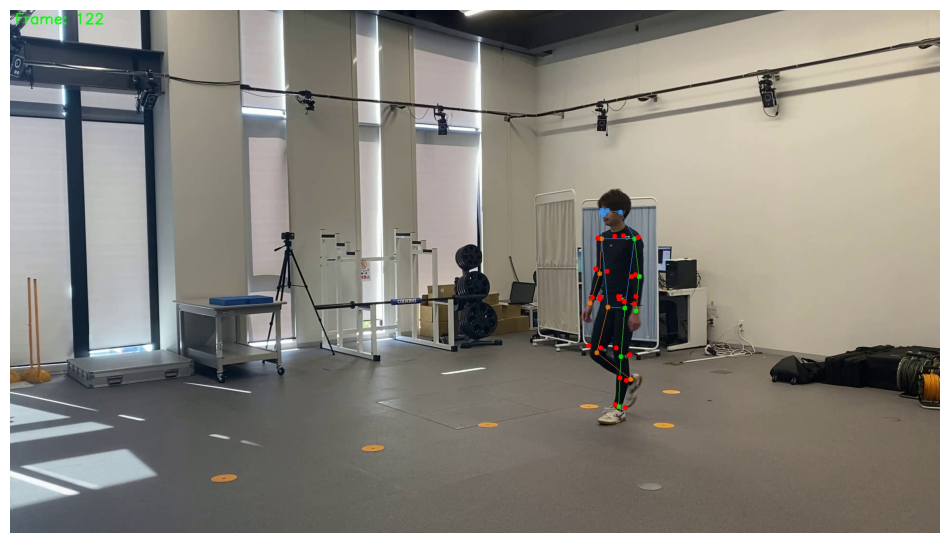

In [39]:
idx = 120

img_path = f"img/hirasaki_{camera_num}_{data_num}/hirasaki_{camera_num}_{data_num}_{idx+2}.jpg"
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

for col in columns_basic:
    x, y = df_2d_projected.loc[idx, [col + "_x", col + "_y"]]
    cv2.circle(img, (int(x), int(y)), 5, (255, 0, 0), -1)

plt.figure(figsize=(12, 12))
plt.imshow(img)
plt.axis("off")
plt.show()

In [ ]:
# 動画の作成
fourcc = cv2.VideoWriter_fourcc(*'mp4v')\
    
    
video = cv2.VideoWriter(f"28/hirasaki_{camera_num}_{data_num}_projected.mp4", fourcc, 30.0, (img.shape[1], img.shape[0]))

for idx in df_2d_projected.index:
    img = cv2.imread(f"img/hirasaki_{camera_num}_{data_num}/hirasaki_{camera_num}_{data_num}_{idx+lag}.jpg")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    for col in columns_basic:
        x, y = df_2d_projected.loc[idx, [col + "_x", col + "_y"]]
        cv2.circle(img, (int(x), int(y)), 5, (255, 0, 0), -1)
    video.write(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

video.release()